# SPOT Kriging in 6 Dimensions: Nyström Approximation vs. Exact (Rosenbrock Function)

This notebook demonstrates how to use the `Spot` class from `spotpython` with and without the Nyström approximation for Kriging surrogates on the 6-dimensional Rosenbrock function.

We use a maximum of 100 function evaluations.

In [1]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

Seed set to 123


## Define the 6D Rosenbrock Function

In [2]:
# do not change, these are given by the organizers
dim = 6
lower = np.full(dim, -2)
upper = np.full(dim, 2)
fun = Analytical().fun_rosenbrock
fun_evals = 100

## Set up SPOT Controls

## Regression and y as Infill Criterion

In [3]:
init_size = 12
use_nystrom = False
method = "regression"
infill_criterion = "y"
tolerance_x = 1e-6
seed = 321
max_surrogate_points = 24
min_Lambda = -4
max_Lambda = 3
min_theta = -1
max_theta = 1
isotropic = False

In [4]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method, max_surrogate_points=max_surrogate_points, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_03_08_04_35_0
Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_08-04-35 for SummaryWriter()


spotpython tuning: 45.355898844847545 [#---------] 13.00% 
spotpython tuning: 39.27689246985392 [#---------] 14.00% 
spotpython tuning: 39.27689246985392 [##--------] 15.00% 
spotpython tuning: 39.27689246985392 [##--------] 16.00% 
spotpython tuning: 14.210612708343556 [##--------] 17.00% 
spotpython tuning: 14.210612708343556 [##--------] 18.00% 
spotpython tuning: 14.210612708343556 [##--------] 19.00% 
spotpython tuning: 14.210612708343556 [##--------] 20.00% 
spotpython tuning: 14.210612708343556 [##--------] 21.00% 
spotpython tuning: 14.210612708343556 [##--------] 22.00% 
spotpython tuning: 14.210612708343556 [##--------] 23.00% 
spotpython tuning: 14.210612708343556 [##--------] 24.00% 
spotpython tuning: 14.210612708343556 [##--------] 25.00% 
spotpython tuning: 14.210612708343556 [###-------] 26.00% 
spotpython tuning: 14.210612708343556 [###-------] 27.00% 
spotpython tuning: 14.210612708343556 [###-------] 28.00% 
spotpython tuning: 14.210612708343556 [###-------] 29.00% 


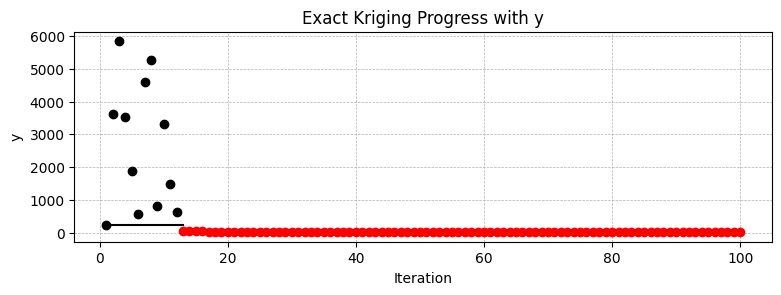

In [5]:
try:
    spot_exact_y = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
    spot_exact_y.run()
    exact_success_y = True
except Exception as e:
    print(f"Exact Kriging failed: {e}")
    exact_success_y = False
if exact_success_y:
    spot_exact_y.plot_progress(log_y=False, title="Exact Kriging Progress with y")

## Regression  and  Expected Improvement as Infill Criterion

In [6]:
infill_criterion = "ei"

In [7]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method,min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_08-05-12 for SummaryWriter()


spotpython tuning: 46.463114317548616 [#---------] 13.00% 
spotpython tuning: 46.463114317548616 [#---------] 14.00% 
spotpython tuning: 46.463114317548616 [##--------] 15.00% 
spotpython tuning: 46.463114317548616 [##--------] 16.00% 
spotpython tuning: 46.463114317548616 [##--------] 17.00% 
spotpython tuning: 46.463114317548616 [##--------] 18.00% 
spotpython tuning: 46.463114317548616 [##--------] 19.00% 
spotpython tuning: 46.463114317548616 [##--------] 20.00% 
spotpython tuning: 46.463114317548616 [##--------] 21.00% 
spotpython tuning: 46.463114317548616 [##--------] 22.00% 
spotpython tuning: 46.463114317548616 [##--------] 23.00% 
spotpython tuning: 46.463114317548616 [##--------] 24.00% 
spotpython tuning: 46.463114317548616 [##--------] 25.00% 
spotpython tuning: 46.463114317548616 [###-------] 26.00% 
spotpython tuning: 38.62085661922275 [###-------] 27.00% 
spotpython tuning: 30.093355558695162 [###-------] 28.00% 
spotpython tuning: 30.093355558695162 [###-------] 29.00%

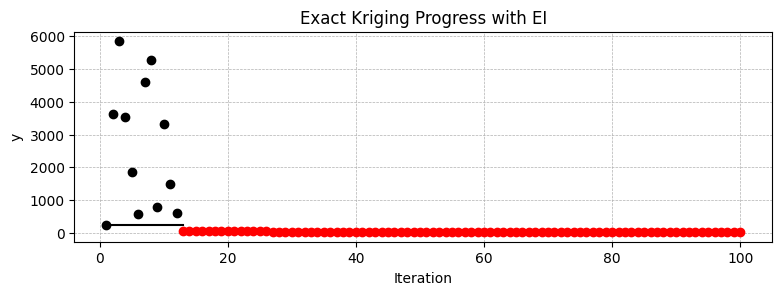

In [8]:
try:
    spot_exact_ei = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
    spot_exact_ei.run()
    exact_success_ei = True
except Exception as e:
    print(f"Exact Kriging failed: {e}")
    exact_success_ei = False
if exact_success_ei:
    spot_exact_ei.plot_progress(log_y=False, title="Exact Kriging Progress with EI")

## Regression and y with Nyström Kriging

In [9]:
use_nystrom = True
nystrom_m = 5
infill_criterion = "y"

In [10]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_nystrom = surrogate_control_init(use_nystrom=use_nystrom, nystrom_m=nystrom_m, method=method, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_08-06-11 for SummaryWriter()


spotpython tuning: 138.3502768064846 [#---------] 13.00% 
spotpython tuning: 138.3502768064846 [#---------] 14.00% 
spotpython tuning: 138.3502768064846 [##--------] 15.00% 
spotpython tuning: 138.3502768064846 [##--------] 16.00% 
spotpython tuning: 138.3502768064846 [##--------] 17.00% 
spotpython tuning: 138.3502768064846 [##--------] 18.00% 
spotpython tuning: 138.3502768064846 [##--------] 19.00% 
spotpython tuning: 138.3502768064846 [##--------] 20.00% 
Experiment saved to 000_res.pkl


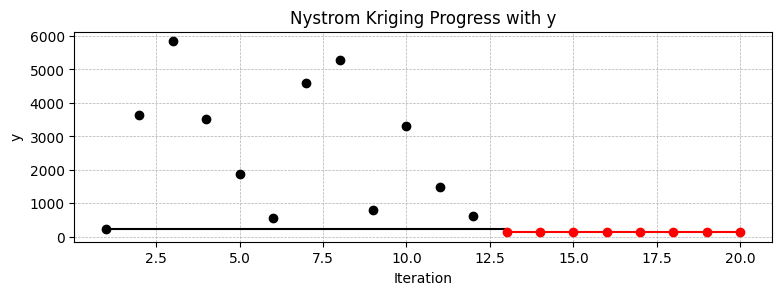

In [11]:
spot_nystrom_y = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_nystrom
)
spot_nystrom_y.run()
spot_nystrom_y.plot_progress(log_y=False, title="Nystrom Kriging Progress with y")

## Regression and ei with Nyström Kriging

In [12]:
infill_criterion = "ei"

In [13]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_nystrom = surrogate_control_init(use_nystrom=use_nystrom, nystrom_m=nystrom_m, method=method, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_08-07-14 for SummaryWriter()


spotpython tuning: 138.3795005075043 [#---------] 13.00% 
spotpython tuning: 138.3795005075043 [#---------] 14.00% 
spotpython tuning: 138.3795005075043 [##--------] 15.00% 
spotpython tuning: 138.3795005075043 [##--------] 16.00% 
spotpython tuning: 138.3795005075043 [##--------] 17.00% 
spotpython tuning: 138.3795005075043 [##--------] 18.00% 
spotpython tuning: 138.3795005075043 [##--------] 19.00% 
spotpython tuning: 138.3795005075043 [##--------] 20.00% 
spotpython tuning: 138.3795005075043 [##--------] 21.00% 
Experiment saved to 000_res.pkl


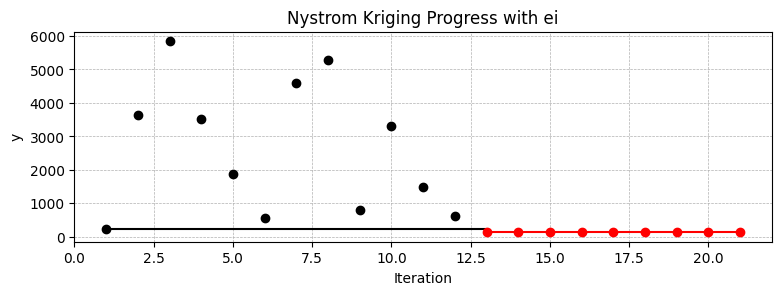

In [14]:
spot_nystrom_ei = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_nystrom
)
spot_nystrom_ei.run()
spot_nystrom_ei.plot_progress(log_y=False, title="Nystrom Kriging Progress with ei")

## Compare Minimum Found

In [15]:
print(f"[6D] Exact Kriging y: min y = {spot_exact_y.min_y:.4f} at x = {spot_exact_y.min_X}")
print(f"[6D] Exact Kriging ei: min y = {spot_exact_ei.min_y:.4f} at x = {spot_exact_ei.min_X}")
print(f"[6D] Nyström Kriging y: min y = {spot_nystrom_y.min_y:.4f} at x = {spot_nystrom_y.min_X}")
print(f"[6D] Nyström Kriging ei: min y = {spot_nystrom_ei.min_y:.4f} at x = {spot_nystrom_ei.min_X}")

[6D] Exact Kriging y: min y = 11.5329 at x = [-0.10774063 -0.12171673  0.07238434 -0.05684125  0.19733827 -0.00152175]
[6D] Exact Kriging ei: min y = 22.8809 at x = [-0.34212769  0.36719484  0.27072606  0.02732408 -0.26681099 -0.07449823]
[6D] Nyström Kriging y: min y = 138.3503 at x = [ 0.05505736 -0.69227988 -0.21066436 -0.19104675  0.41042137  0.56710779]
[6D] Nyström Kriging ei: min y = 138.3795 at x = [ 0.05536531 -0.69261472 -0.2105068  -0.19188079  0.41027378  0.56613323]


x0:  19.61306371090211
x1:  19.61306371090211
x2:  19.61306371090211
x3:  100.0
x4:  75.54418512601495
x5:  19.61306371090211


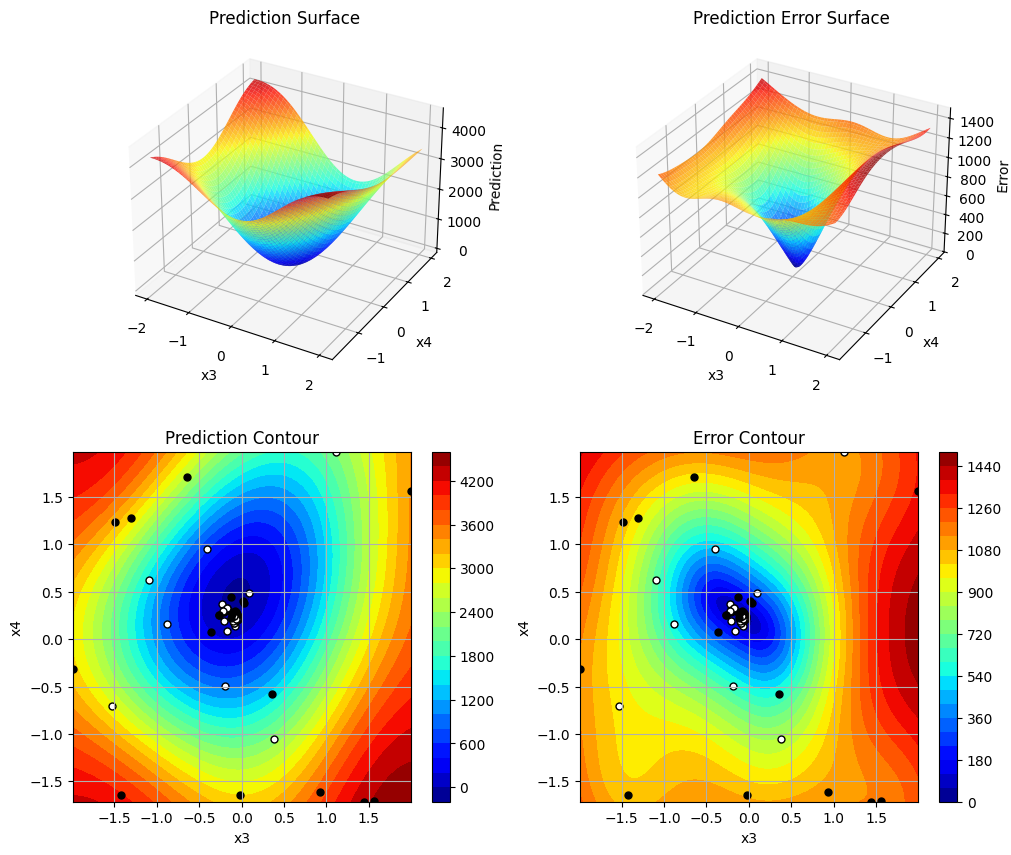

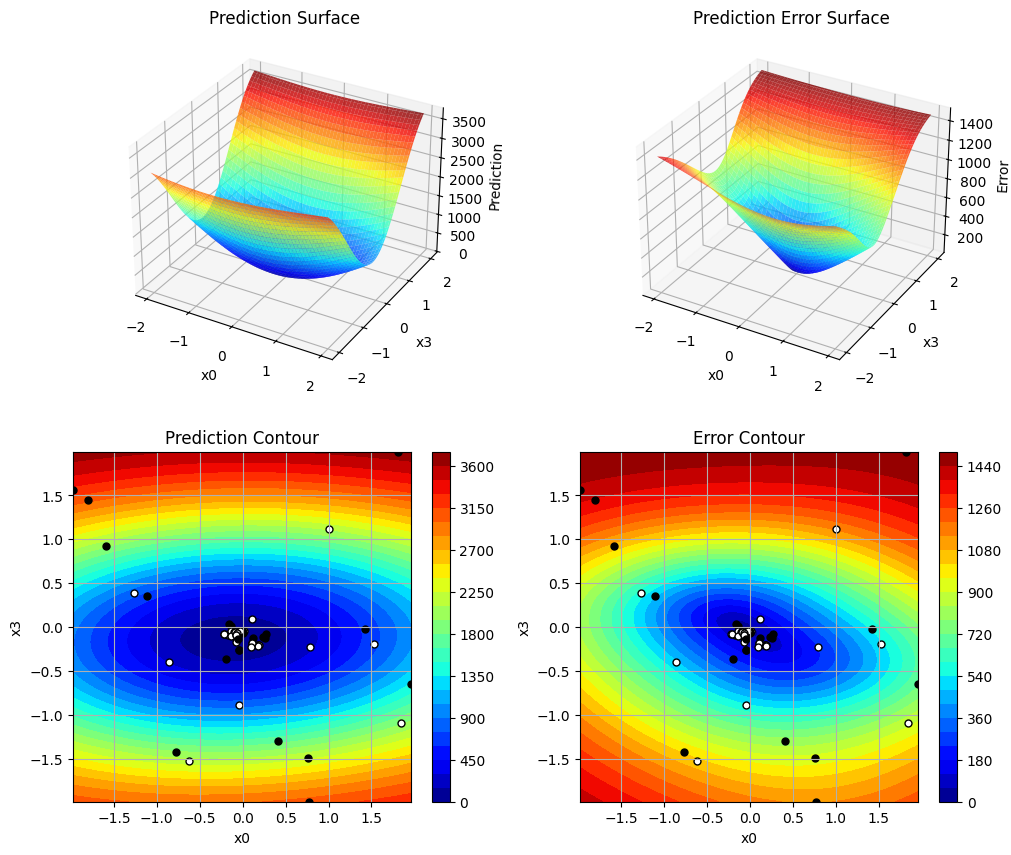

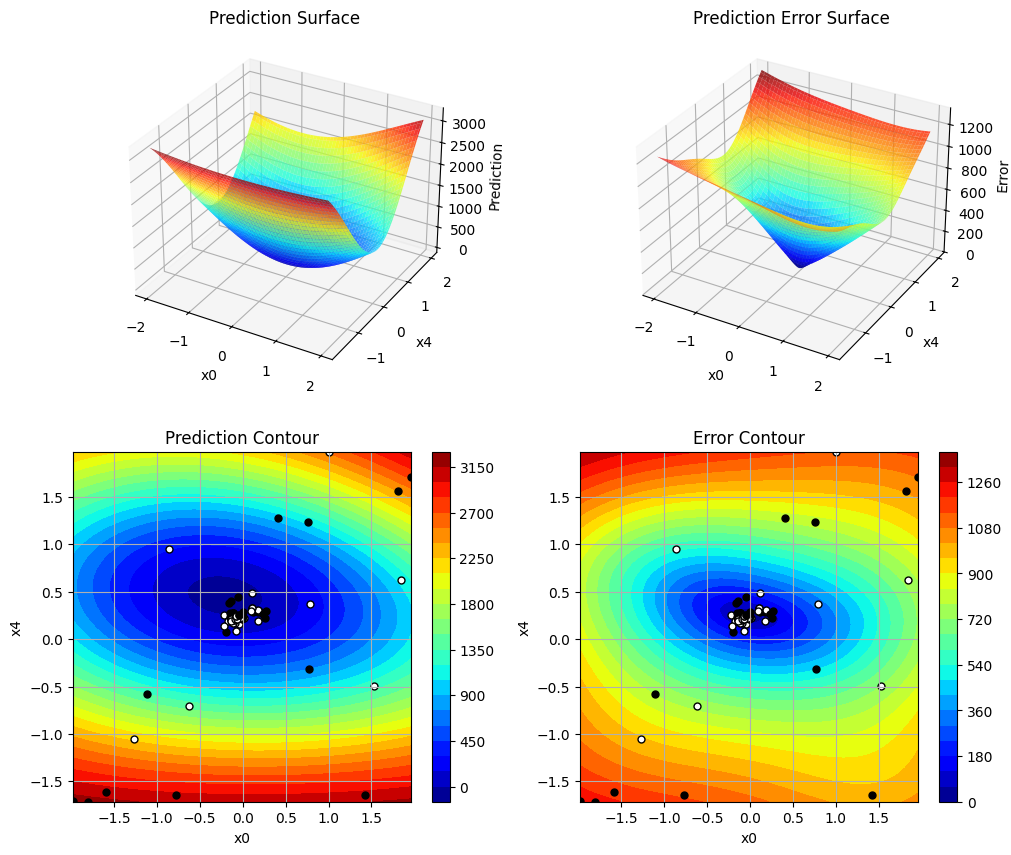

In [16]:
spot_exact_y.plot_important_hyperparameter_contour(max_imp=3)
